# Point Process with detection threshold = 3

In [1]:
from NewLibraryENGcopia import *
import glob
list_dir=glob.glob("/Users/Gaia_1/Desktop/Data after SS thresh 3/*.txt")
for file in list_dir:
    print(file)
print(len(list_dir))

/Users/Gaia_1/Desktop/Data after SS thresh 3/After2019-01-23T11-41-41Pop1 healthy cortical .h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018-11-28T11-29-05MIP 5 KA 24hrs after.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2019-01-24T15-49-35Pop3 24hour after KA healthy modifiedname.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018-11-28T11-55-53MIP3 KA 24hrs after.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018-11-28T12-08-45MIP4 KA 24hrs after.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2019-01-24T15-38-41MiP2 24hour after KA healthy modifiedname.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018-11-27T10-03-29MIP4 BL .h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018-11-27T09-22-44MIP 5 BL .h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2019-01-24T16-00-33Pop1 24hour after healthy modifiedname.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018

In [5]:
from NewLibraryENGcopia import *
import glob
finaldf=[]
output_path='/Users/Gaia_1/Desktop/Data after SS thresh 3'
list_dir=glob.glob(output_path+"/*.txt")

#for file in tqdm(list_dir):
file=list_dir[1]
file_name = file.split("/")[-1]
target=1
stim=0
if 'health' in file_name:
    target=0
if 'after' in file_name:
    stim=1
if target==1:
    print(file_name,'target',target,'stimulation',stim)
    df=this_poiproc(file,target,stim)
    finaldf.append(df)

After2018-11-28T11-29-05MIP 5 KA 24hrs after.h5.txt.txt target 1 stimulation 1
Original number of neurons:  58


  0%|          | 0/58 [00:00<?, ?it/s]

  Neuron with  1343 spikes



An error occurred: name 'd' is not defined
  Neuron with  1403 spikes


KeyboardInterrupt: 

In [17]:
output_path='/Users/Gaia_1/Desktop/Data after SS thresh 3'
list_dir=glob.glob(output_path+"/*.txt")

for file in tqdm(list_dir):
    print(file)
file=list_dir[0]


  0%|          | 0/17 [00:00<?, ?it/s]

/Users/Gaia_1/Desktop/Data after SS thresh 3/After2019-01-23T11-41-41Pop1 healthy cortical .h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018-11-28T11-29-05MIP 5 KA 24hrs after.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2019-01-24T15-49-35Pop3 24hour after KA healthy modifiedname.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018-11-28T11-55-53MIP3 KA 24hrs after.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018-11-28T12-08-45MIP4 KA 24hrs after.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2019-01-24T15-38-41MiP2 24hour after KA healthy modifiedname.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018-11-27T10-03-29MIP4 BL .h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018-11-27T09-22-44MIP 5 BL .h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2019-01-24T16-00-33Pop1 24hour after healthy modifiedname.h5.txt.txt
/Users/Gaia_1/Desktop/Data after SS thresh 3/After2018

6036


Sequential sampling (1 chains in 1 job)
NUTS: [mu1, lam1, mu2, sigma2, mu3, sigma3, w]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 137 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [like]


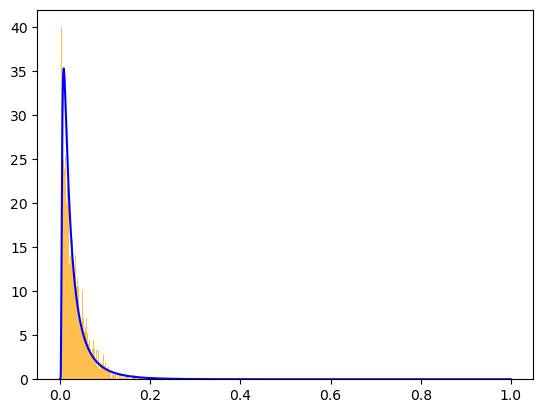

ks score:  KstestResult(statistic=0.06822512848998086, pvalue=7.971955694493988e-25, statistic_location=0.0273, statistic_sign=-1)


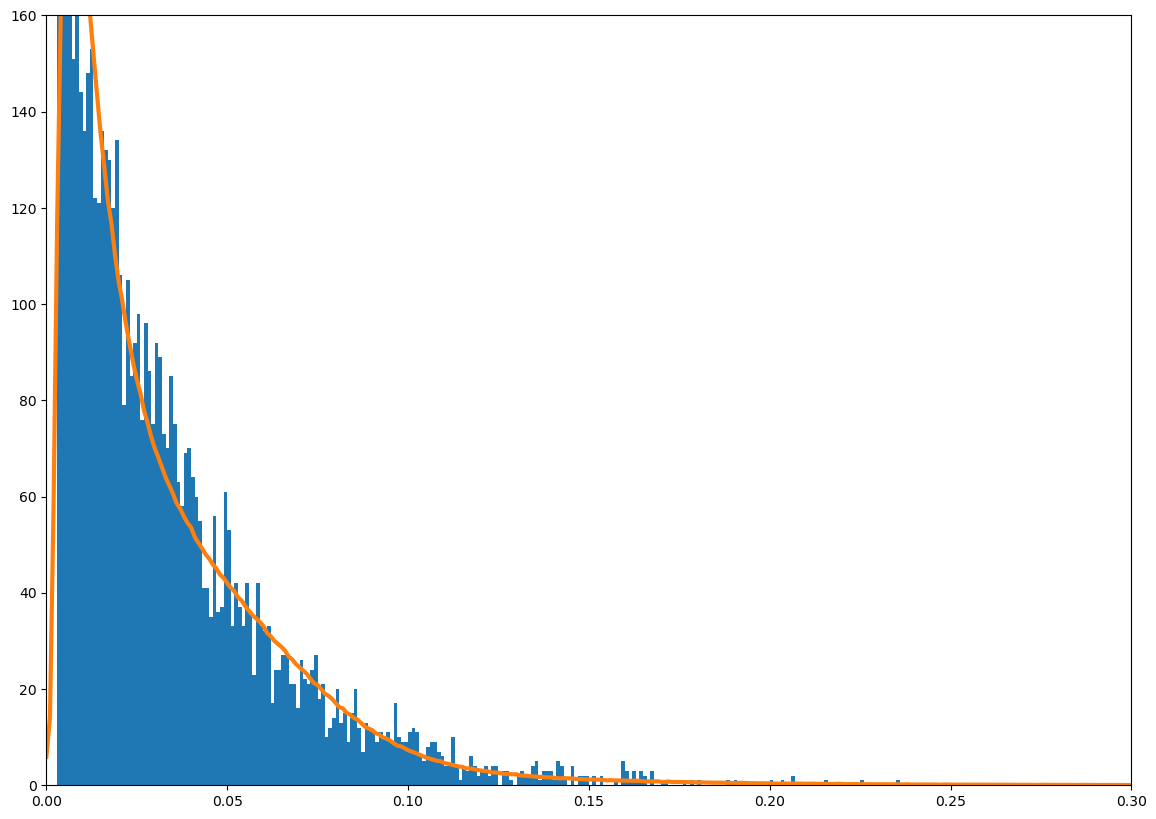

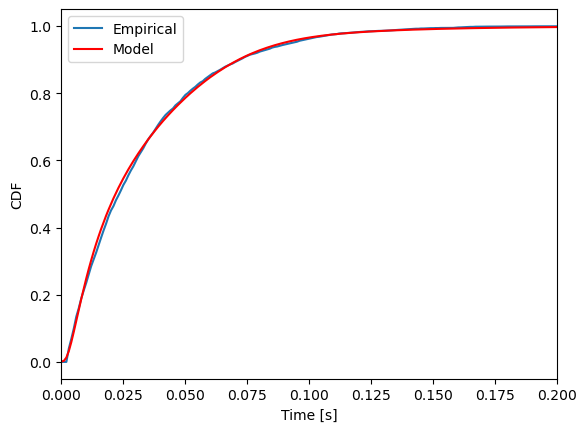

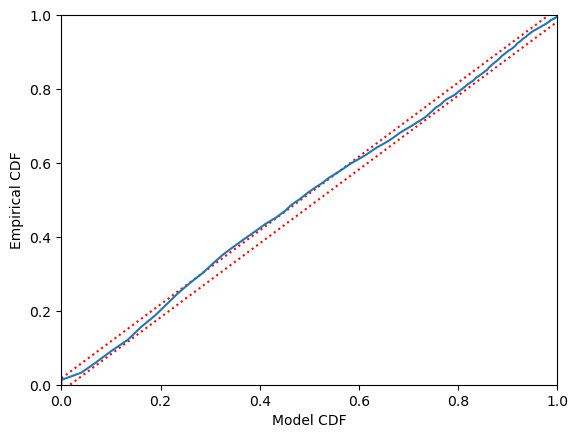

0.03927091963545981
{'mu1': array(0.03313427), 'lam1': array(0.0260592), 'mu2': array(0.06314898), 'sigma2': array(0.03673178), 'mu3': array(0.38617238), 'sigma3': array(0.35019699), 'w1': 0.9999999836935449, 'w2': 1.0337843729654605e-08, 'w3': 5.96861138003247e-09}


In [112]:
list_neurons= np.genfromtxt(file, delimiter=',')
neuron=list_neurons[1]
neuron=neuron[neuron>0*10000]
neuron=neuron[neuron<200*10000]
print(neuron.shape[0])
ISI_healthy = np.diff(neuron)/10000
if neuron.shape[0]>1000:
    map_estimate=this_Bayesian_mixture_model(ISI_healthy)

# Functions

In [1]:
def this_Bayesian_mixture_model(ISI_data):
    import scipy.stats as st
    with pm.Model() as model:
        ##### WALD DISTRIBUTION (INVERSE GAUSSIAN)
        mu1 = pm.Uniform('mu1',lower=0,upper=0.2)
        lam1 = pm.Uniform('lam1',lower=0.001,upper=0.05)
        obs1 = pm.Wald.dist(mu=mu1,lam=lam1)


        mu2 = pm.Uniform('mu2',lower=0,upper=0.2)
        sigma2 = pm.Uniform('sigma2',lower=0.01,upper=0.7)
        obs2 = pm.TruncatedNormal.dist(mu=mu2, sigma=sigma2, lower=0.0)

        mu3 = pm.Uniform('mu3',lower=0.2,upper=0.6)
        sigma3 = pm.Uniform('sigma3',lower=0.01,upper=0.7)
        obs3 = pm.TruncatedNormal.dist(mu=mu3, sigma=sigma3, lower=0.0)
        
        w = pm.Dirichlet('w', a=np.array([1., 1., 1.]))
        like = pm.Mixture('like', w=w, comp_dists = [obs1, obs2, obs3], observed=ISI_data)
        step = pm.NUTS(target_accept=0.9)
        #trace = pm.sample(step=step,draws=4,tune=1000,cores=4)
        trace = pm.sample(step=step,draws=1000,chains=1,tune=1000,cores=4)
        ppc_trace = pm.sample_posterior_predictive(trace,model=model)
        
    map_estimate = pm.find_MAP(model=model)
    d= np.linspace(0.00, 1, len(ISI_data))
    map_estimate['w1'] = map_estimate['w'][0]
    map_estimate['w2'] = map_estimate['w'][1]
    map_estimate['w3'] = map_estimate['w'][2]
    
    mu1=map_estimate['mu1']
    mu2=map_estimate['mu2']
    mu3=map_estimate['mu3']
    lam1=map_estimate['lam1']
    sigma2=map_estimate['sigma2']
    sigma3=map_estimate['sigma3']
    w1=map_estimate['w1']
    w2=map_estimate['w2']
    w3=map_estimate['w3']       
    
    pdf = w1*st.invgauss.pdf(d, mu1/lam1, scale = lam1) + w2*st.norm.pdf(d, mu2, sigma2) + w3*st.norm.pdf(d, mu3, sigma3)
    bins = np.arange(0, .5, 1e-3) 
    
    plt.hist(ISI_data, bins, color='orange', alpha=0.7, label='Histogram',density=True)
    plt.plot(d, pdf, color='blue', label='PDF')
    #plt.xlim(0, 0.2)
    plt.show()

    cdf_2gauss = lambda x: w1 * st.invgauss.cdf(x,mu1/lam1, scale = lam1) + w2 * st.norm.cdf(x, mu2, sigma2) + w3*st.norm.cdf(x, mu3, sigma3)
    ks_score=st.ks_1samp(ISI_data[ISI_data>0],  cdf_2gauss, method = 'asymp')
    print('ks score: ',ks_score)
    

    bins = np.arange(0, .5, 1e-3) 
    plt.figure (figsize=(14,10))

    hist = np.histogram(ppc_trace['posterior_predictive']['like'],bins=bins)
    plt.axis([0,0.3,0,160])
    a= plt.hist(ISI_data,bins)
    plt.plot(hist[1][:-1],hist[0]/1000,linewidth=3)
    
    lista_samples=[]
    for i in list(ppc_trace['posterior_predictive']['like']):
        lista_samples.extend(i)

    counts, _ = np.histogram(ISI_data, bins) 
    prob_emp = counts / (sum(counts))
    counts, _ = np.histogram(lista_samples, bins) 
    prob_model = counts / (sum(counts))

    Femp = np.cumsum(prob_emp)           
    Fmodel = np.cumsum(prob_model)          
    plt.figure()
    plt.plot(bins[:-1], Femp)                
    plt.plot(bins[:-1], Fmodel, 'r')       
    plt.xlim([0, 0.2])                  
    plt.xlabel('Time [s]')
    plt.ylabel('CDF')
    plt.legend(['Empirical','Model'])
    plt.show()    
    plt.figure()
    Nlow = len(ISI_data)
    # Plot the confidence bounds
    plt.plot([0, 1], [x + 1.36 / np.sqrt(Nlow) for x in [0, 1]], 'r:')
    plt.plot([0, 1], [x - 1.36 / np.sqrt(Nlow) for x in [0, 1]], 'r:')
    plt.plot(Femp, Fmodel)    
    plt.axis([0, 1, 0, 1])         
    plt.xlabel('Model CDF')
    plt.ylabel('Empirical CDF')
    plt.show()
    ex=ppc_trace['posterior_predictive']['like'].values[0][0]
    score2=st.ks_2samp(ex,ISI_data,mode = 'asymp')
    print(score2[0])
    
    del map_estimate['w_simplex__']
    del map_estimate['mu1_interval__']
    del map_estimate['lam1_interval__']
    del map_estimate['mu2_interval__']
    del map_estimate['sigma2_interval__']
    del map_estimate['mu3_interval__']
    del map_estimate['sigma3_interval__']
    
    del map_estimate['w']

    print(map_estimate)
    #if ks_score[0]>0.35:
        #map_estimate=0
    return map_estimate


In [3]:
def this_poiproc(file,target,stim,):
    dataframe = pd.DataFrame()
    counter=0
    list_neurons = np.genfromtxt(file, delimiter=',')
    counter=0
    print('Original number of neurons: ',len(list_neurons))
    for neuron in tqdm(list_neurons):
        neuron=neuron[neuron>0*10000]
        neuron=neuron[neuron<200*10000]
        #print('  Neuron with ',neuron.shape[0],'spikes')
        if neuron.shape[0]>800:
            
            print('  Neuron with ',neuron.shape[0],'spikes')
        else:
            print('    Excluded neuron with n spikes = ',neuron.shape[0])
            continue
        
        ISI_healthy = np.diff(neuron)/10000
        try:
            map_estimate = this_Bayesian_mixture_model(ISI_healthy)
        except Exception as e:
            print(f"An error occurred: {e}")
            continue
        if map_estimate!=0:
            counter+=1
            map_estimate['Target']=target
            map_estimate['Stimulation']=stim
            df = pd.DataFrame.from_dict(map_estimate,orient='index')
            dataframe = pd.concat([dataframe,df],axis = 1)
    print('Final number of neurons: ',counter)
    print('Target = ',target)
    file_name = file.split("/")[-1]
    final = dataframe.T
    #final.to_csv('Data after PP thresh 3/'+file_name)
    final.to_csv('Data after PP thresh 3/'+file_name+'prove')
    return dataframe
